# Importing Libraries

In [330]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline

# Loading & Exploring Data

In [333]:
# Load data into the dataframe
rawdf = pd.read_csv("Resources/cardata.csv")

# Display top 5 rows
rawdf.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Exploratory Data Analysis
Ideas for Exploratory Data Analysis (EDA)
- Look at Datatypes
- .describe()
- Look at Columns, decide if there are any worth removing
- Rename columns
- Remove duplicates
- Drop Null values
- Identify and remove outliers

Graph ideas
- Histogram of make, model, year, Cylinders, transmission
- (Avg hwy mpg, city mpg, popularity) by (Make, Model, Year)
- Correlation matrix ('heat map')
  - Scatterplot of any two metrics that have a correlation higher than +/- .6
- 3D graph of some data 

In [336]:
# Explore datatypes of each column of the dataframe
rawdf.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [338]:
# Does a statistical analysis of all columns with numeric datatypes 
rawdf.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [340]:
# Checks the number of rows and columns respectively
rawdf.shape

(11914, 16)

In [342]:
# Counts the number of non-Null values in each column
rawdf.count()

Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64

# Drop Unnecessary Data

In [345]:
# Remove the 'Market Category column due to have so many NULL values
# Keeping this column will eliminate a lot of other data later since it has so many less values
rawdf = rawdf.drop(['Market Category'], axis=1)
rawdf.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [347]:
# Removing all rows that have duplicate values and seeing the new count of rows
cleandf=rawdf.drop_duplicates()
cleandf.count()

Make                 11194
Model                11194
Year                 11194
Engine Fuel Type     11191
Engine HP            11125
Engine Cylinders     11164
Transmission Type    11194
Driven_Wheels        11194
Number of Doors      11188
Vehicle Size         11194
Vehicle Style        11194
highway MPG          11194
city mpg             11194
Popularity           11194
MSRP                 11194
dtype: int64

In [349]:
# Counts the number of Null values in each row. The inverse of the above cell
cleandf.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [351]:
# Drops all rows containing null values from the dataframe
cleandf= cleandf.dropna()
cleandf.count()

Make                 11092
Model                11092
Year                 11092
Engine Fuel Type     11092
Engine HP            11092
Engine Cylinders     11092
Transmission Type    11092
Driven_Wheels        11092
Number of Doors      11092
Vehicle Size         11092
Vehicle Style        11092
highway MPG          11092
city mpg             11092
Popularity           11092
MSRP                 11092
dtype: int64

In [353]:
# Counts the number of Null values in each column. Showing that the .dropna() worked
cleandf.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

# Analyze Ouliers

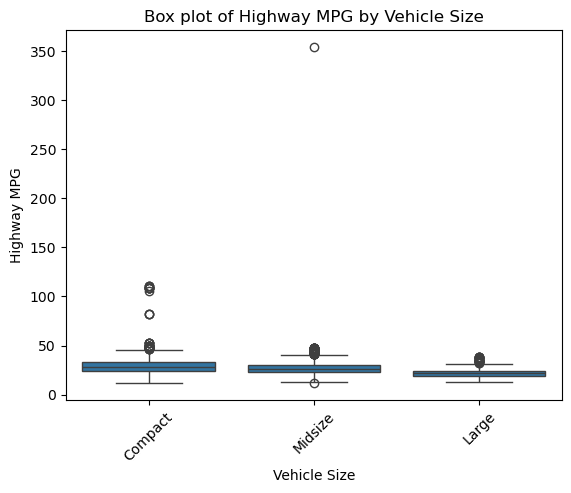

In [356]:
# Create a Boxplot of highway MPG broken down by vehicle size. 
# This can help show if outliers exist graphically using the cleandf dataframe to create the boxplot
sns.boxplot(data = cleandf, x = 'Vehicle Size', y = 'highway MPG')

# Adds a title to the graph
plt.title('Box plot of Highway MPG by Vehicle Size')

# Names the x and y axis
plt.xlabel('Vehicle Size')
plt.ylabel('Highway MPG')

# For readability, the lables on the x axis are tilted 45 degrees
plt.xticks(rotation=45)

# Displays graph
plt.show()

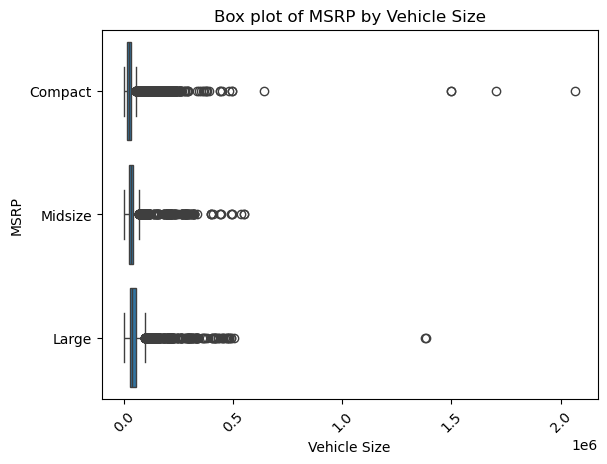

In [358]:
# Create a Boxplot of MSRP broken down by vehicle size.
sns.boxplot(data = cleandf, x = 'MSRP', y = 'Vehicle Size')

# Adds a title to the graph
plt.title('Box plot of MSRP by Vehicle Size')

# Names the x and y axis
plt.xlabel('Vehicle Size')
plt.ylabel('MSRP')

# For readability, the lables on the x axis are tilted 45 degrees
plt.xticks(rotation=45)

# Displays graph
plt.show()

# Data Selection

In [361]:
# Makes a list of all the columns and stores in an object
allcolumns = list(cleandf.columns)
allcolumns

['Make',
 'Model',
 'Year',
 'Engine Fuel Type',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Driven_Wheels',
 'Number of Doors',
 'Vehicle Size',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [363]:
# Copy/paste of the list of columns: Select the columns that are numeric values to use in statistical analysis
numcolumns = [
    # 'Make',
    # 'Model',
    'Year',
    # 'Engine Fuel Type',
    'Engine HP',
    'Engine Cylinders',
    # 'Transmission Type',
    # 'Driven_Wheels',
    'Number of Doors',
    # 'Vehicle Size',
    # 'Vehicle Style',
    'highway MPG',
    'city mpg',
    'Popularity',
    'MSRP'
]
numcolumns

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [365]:
# Create New DataFrame with just the selected (statistical) columns
numdf = cleandf[numcolumns]
numdf.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


# Remove Outliers

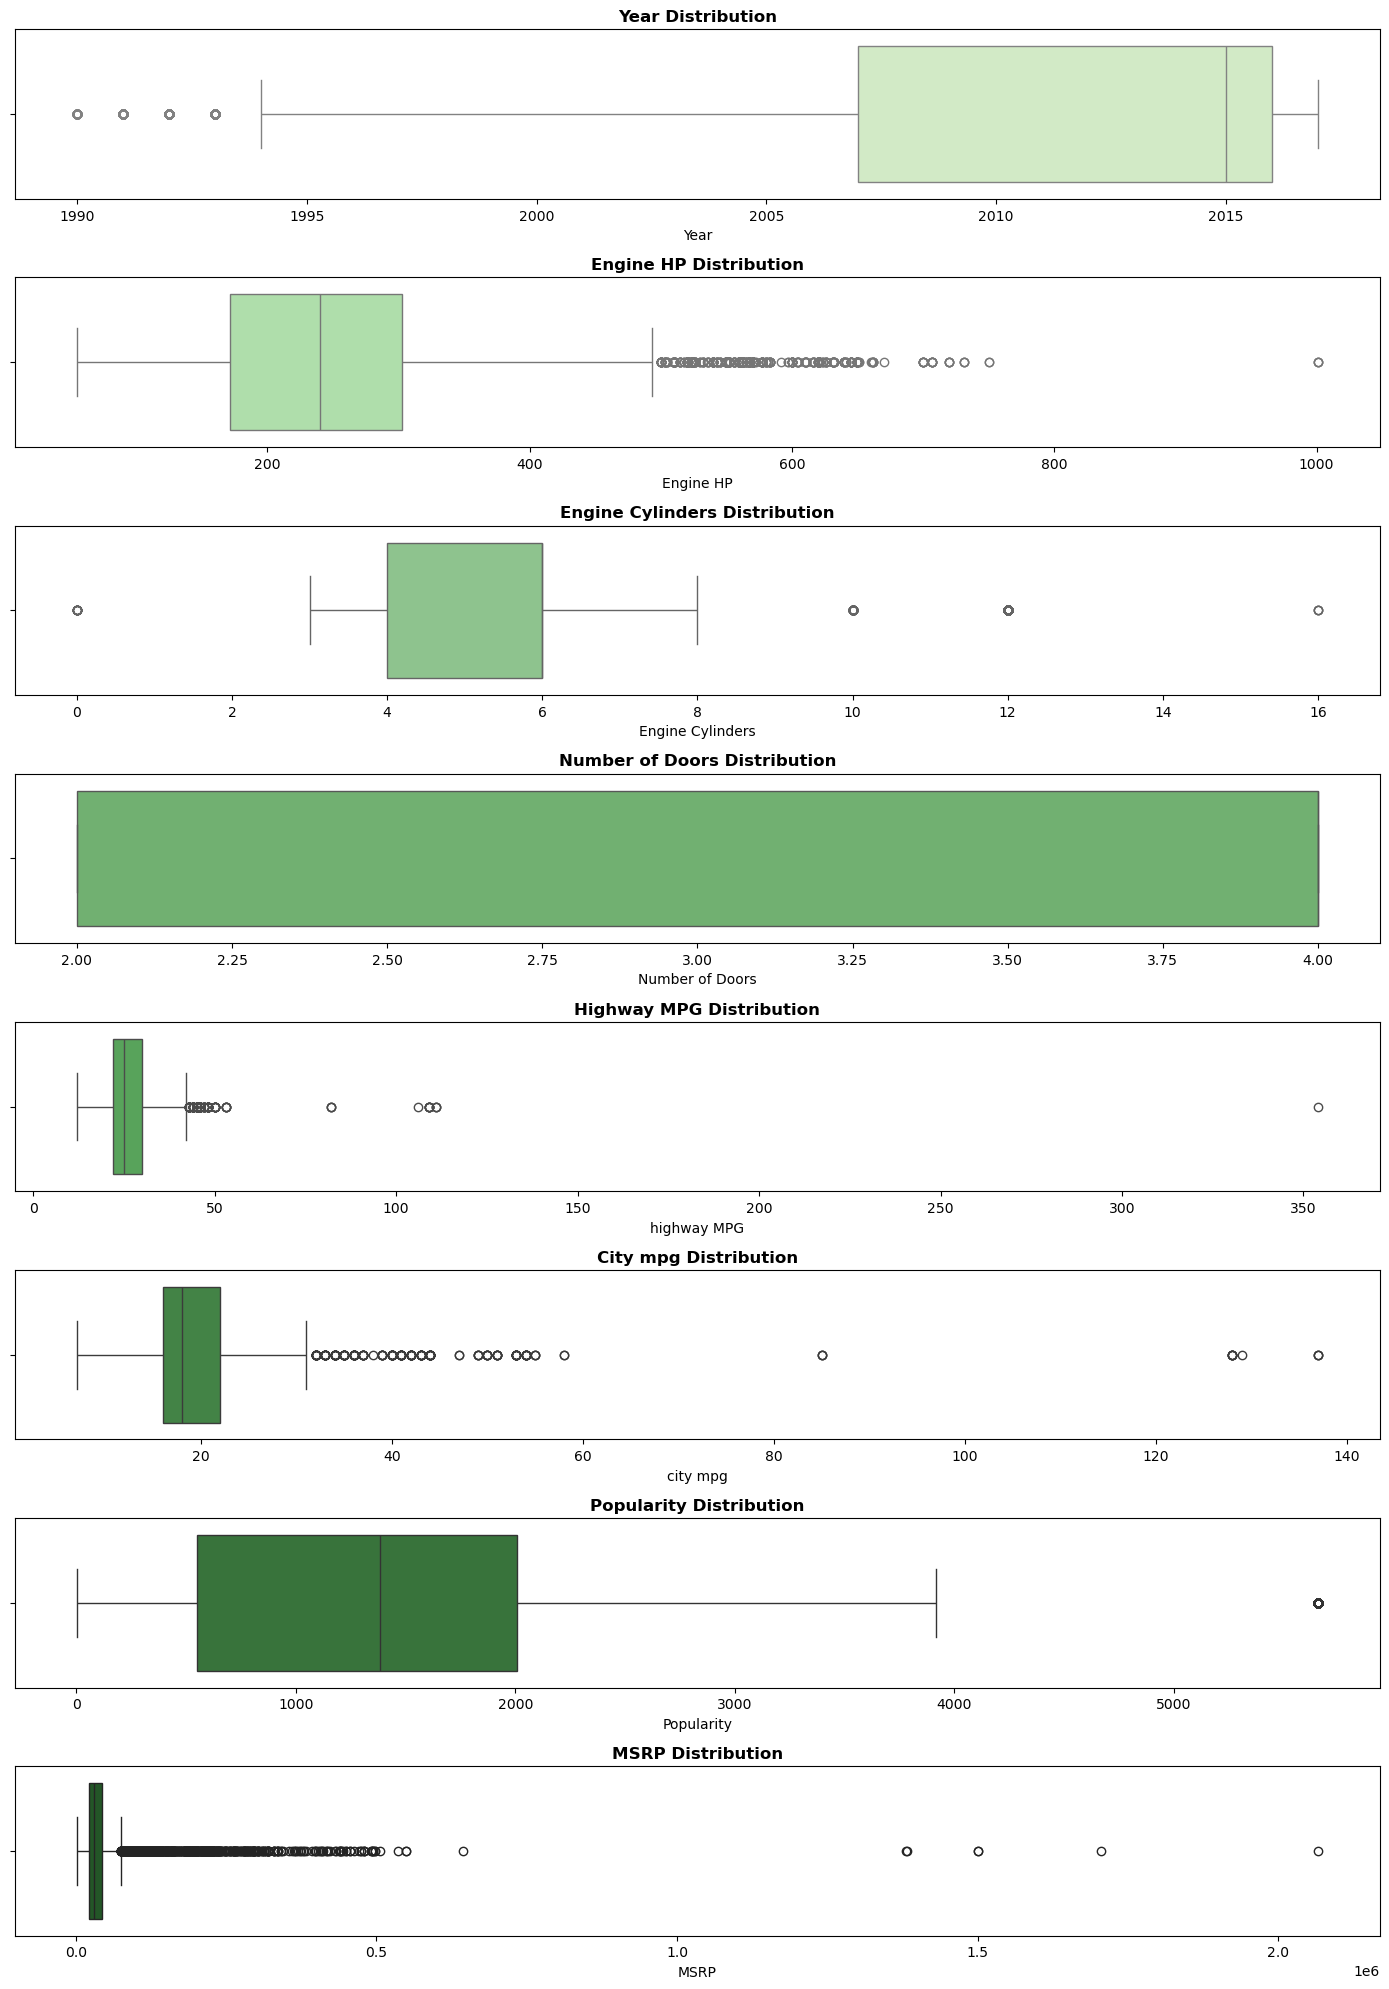

In [368]:
# Create a boxplot visualization for each column

# Create a figure with 8 vertically stacked subplots and specify overall figure size
fig, axes = plt.subplots(8, 1, figsize=(14, 20))  # 8 row, 1 column

# Year
sns.boxplot(x=numdf['Year'], ax=axes[0], color = '#d0f0c0')
axes[0].set_title("Year Distribution", fontweight='bold')

# Engine HP
sns.boxplot(x=numdf['Engine HP'], ax=axes[1], color = "#a8e6a3")
axes[1].set_title("Engine HP Distribution", fontweight='bold')

# Engine Cylinders
sns.boxplot(x=numdf['Engine Cylinders'], ax=axes[2], color = "#85cc85")
axes[2].set_title("Engine Cylinders Distribution", fontweight='bold')

# Number of Doors
sns.boxplot(x=numdf['Number of Doors'], ax=axes[3], color = "#66bb66")
axes[3].set_title("Number of Doors Distribution", fontweight='bold')

# Highway MPG
sns.boxplot(x=numdf['highway MPG'], ax=axes[4], color = "#4caf50")
axes[4].set_title("Highway MPG Distribution", fontweight='bold')

# CIty MGP
sns.boxplot(x=numdf['city mpg'], ax=axes[5], color = "#388e3c")
axes[5].set_title("City mpg Distribution", fontweight='bold')

# Popularity
sns.boxplot(x=numdf['Popularity'], ax=axes[6], color = "#2e7d32")
axes[6].set_title("Popularity Distribution", fontweight='bold')

# MSRP
sns.boxplot(x=numdf['MSRP'], ax=axes[7], color = "#1b5e20")
axes[7].set_title("MSRP Distribution", fontweight='bold')

plt.tight_layout()
plt.show()

In [369]:
# Using the IQR approach to identify and eliminate outliers
Q1 = numdf.quantile(0.25)
Q3 = numdf.quantile(0.75)
# Create IQR
IQR = Q3 - Q1
IQR

Year                    9.0
Engine HP             131.0
Engine Cylinders        2.0
Number of Doors         2.0
highway MPG             8.0
city mpg                6.0
Popularity           1460.0
MSRP                21485.0
dtype: float64

#### Defining a new df that removes outliers.

Outliers are any rows that have a value that is 1.5x the IQR (difference between the first and third quartile) less than the first quartile value, or 1.5x the IQR more than the third quartile value.

Returns the shape, so we can see that values were eliminated.

In [373]:
df = numdf[~((numdf < (Q1 - 1.5 * IQR)) |(numdf > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8609, 8)

# Correlation Matrix

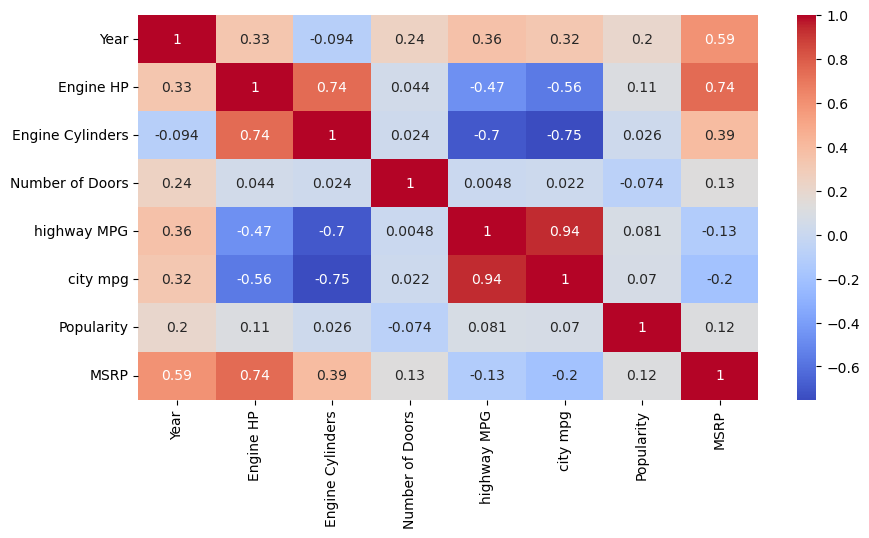

In [376]:
# Create a correlation matrix (or "heat map") of the df values
# These will be used to determin the value pairs to use in scatter plots

# Setting the size of the graph
plt.figure(figsize=(10,5))

# Runs the correlation function for the df and saving it to 'c'
c= df.corr()

# Feeds the correlation matrix into the sns.heatmap function, uses the 'coolwarm' coloring, and annotates the matrix
sns.heatmap(c,cmap="coolwarm",annot=True)

# Calls the graph
plt.show()

#### Corelation Matrix Analysis
Metric combinations with a correlation greater than |.6|
- Engine Cylinders v. Engine HP
- MSRP v. Engine HP
- highway MPG v. Engine Cylinders
- city mpg v. Engine Cylinders
- city mpg v. highway MPG

# Graphs

### Scatter Plots

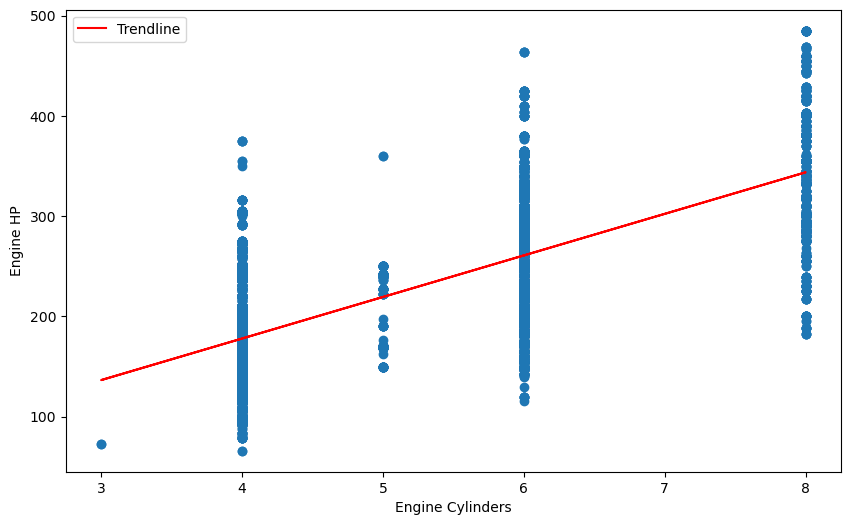

In [380]:
# Plots the first graph. All annotation will be included here, and only changes will be noted in the next 4 graphs
# Defines the figure, and sets the size of the graph
fig2, ax = plt.subplots(figsize=(10,6))

# Defines the x and y columns that will be used
x= 'Engine Cylinders'
y= 'Engine HP'

# Creates the scatterplot
ax.scatter(df[x], df[y])

# Used to create the trendline setting the polyfit by feeding it the x and y values
coef = np.polyfit(df[x], df[y],1)
trendline = np.poly1d(coef)

# Plots the trendline, and labels it in the legend
plt.plot(df[x], trendline(df[x]), label= "Trendline", color ='red')

# Names the x and y axis
ax.set_xlabel(x)
ax.set_ylabel(y)

# Includes a legend on the plot
plt.legend()

# Displays the graph
plt.show()


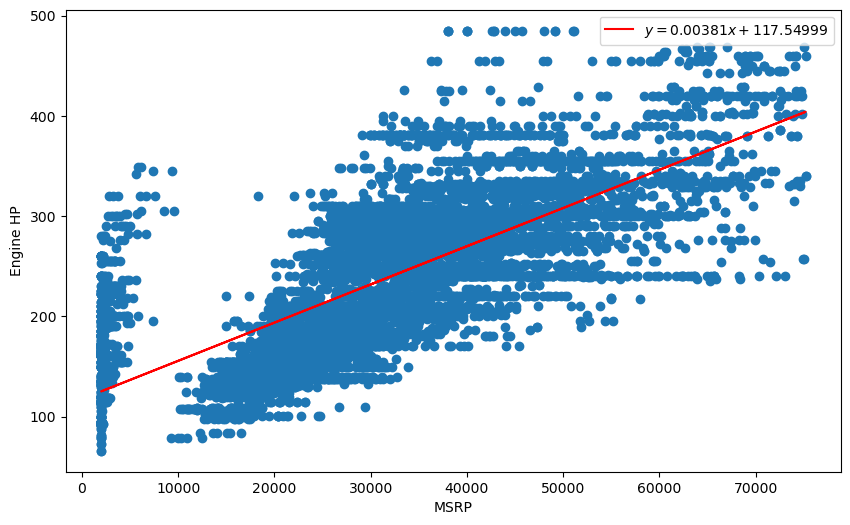

In [382]:
# Defines the figure, and sets the size of the graph
fig3, ax = plt.subplots(figsize=(10,6))

# Defines the x and y columns that will be used
x= 'MSRP'
y= 'Engine HP'

# Creates the scatterplot
ax.scatter(df[x], df[y])

# Used to create the trendline setting the polyfit by feeding it the x and y values
coef = np.polyfit(df[x], df[y],1)
trendline = np.poly1d(coef)

# Uses the polyfit set earlier to display the trendline equation in the legend
plt.plot(df[x], trendline(df[x]), label= f'$y={coef[0]:.5f}x+{coef[1]:.5f}$', color ='red')

# Names the x and y axis
ax.set_xlabel(x)
ax.set_ylabel(y)

# Includes a legend on the plot
plt.legend()

plt.show()

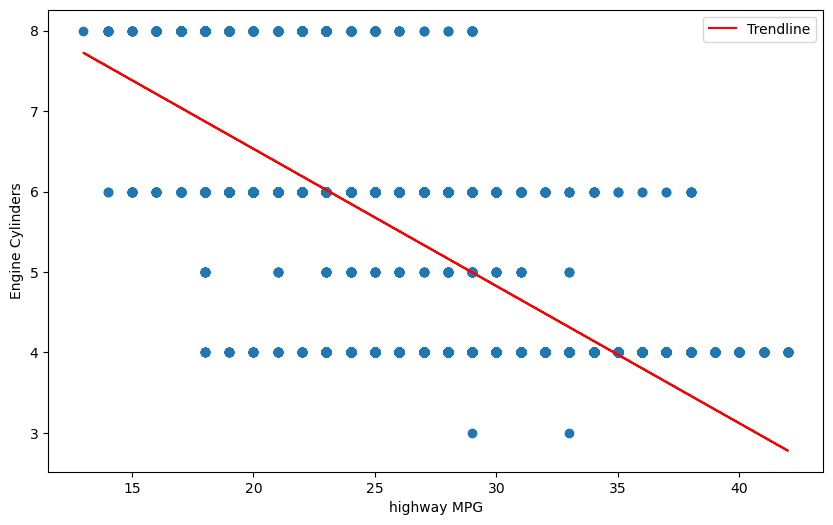

In [384]:
# Defines the figure, and sets the size of the graph
fig4, ax = plt.subplots(figsize=(10,6))

# Defines the x and y columns that will be used
x= 'highway MPG'
y= 'Engine Cylinders'

# Creates the scatterplot
ax.scatter(df[x], df[y])

# Used to create the trendline setting the polyfit by feeding it the x and y values
coef = np.polyfit(df[x], df[y],1)
trendline = np.poly1d(coef)

# Uses the polyfit set earlier to display the trendline equation in the legend
plt.plot(df[x], trendline(df[x]), label= "Trendline", color ='red')

# Names the x and y axis
ax.set_xlabel(x)
ax.set_ylabel(y)

# Includes a legend on the plot
plt.legend()

plt.show()

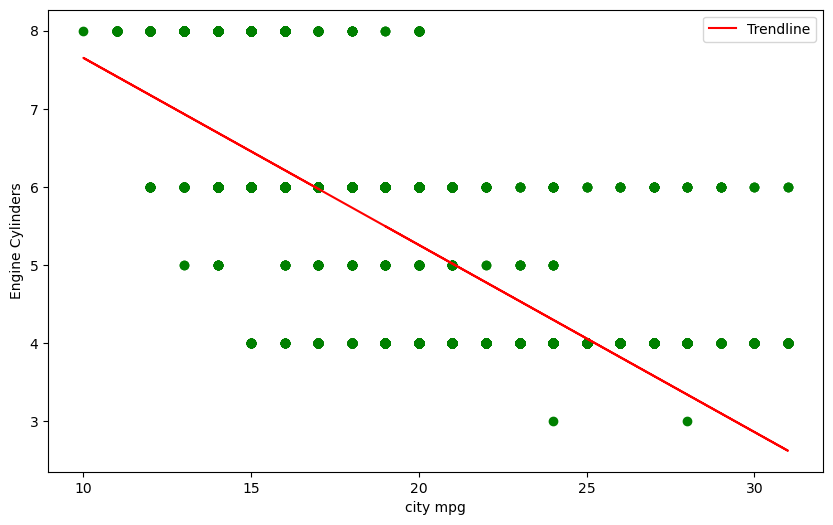

In [386]:
# Defines the figure, and sets the size of the graph
fig5, ax = plt.subplots(figsize=(10,6))

# Defines the x and y columns that will be used
x= 'city mpg'
y= 'Engine Cylinders'

# Creates the scatterplot color of dots was changed to green
ax.scatter(df[x], df[y], color='green')

# Used to create the trendline setting the polyfit by feeding it the x and y values
coef = np.polyfit(df[x], df[y],1)
trendline = np.poly1d(coef)

# Uses the polyfit set earlier to display the trendline equation in the legend
plt.plot(df[x], trendline(df[x]), label= "Trendline", color ='red')

# Names the x and y axis
ax.set_xlabel(x)
ax.set_ylabel(y)

# Includes a legend on the plot
plt.legend()

plt.show()

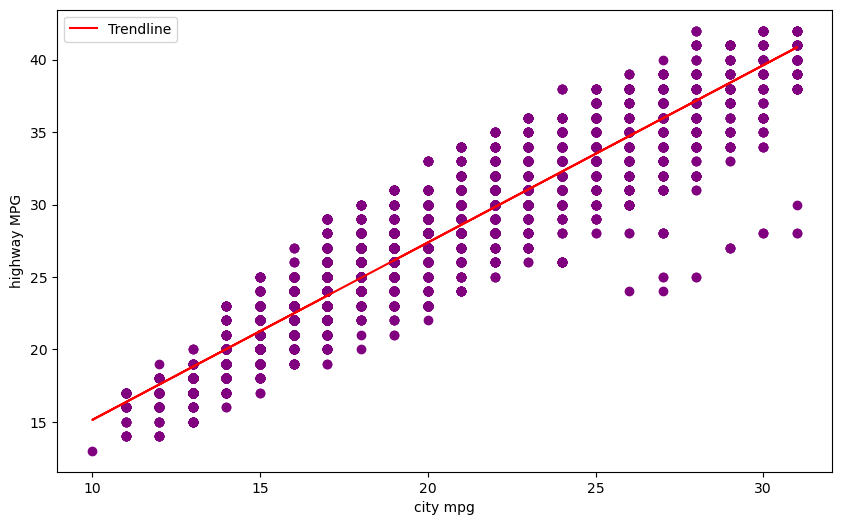

In [388]:
# Defines the figure, and sets the size of the graph
fig6, ax = plt.subplots(figsize=(10,6))

# Defines the x and y columns that will be used
x='city mpg'
y='highway MPG'

# Creates the scatterplot color of dots was changed to purple
ax.scatter(df[x], df[y], color='purple')

# Used to create the trendline setting the polyfit by feeding it the x and y values
coef = np.polyfit(df[x], df[y],1)
trendline = np.poly1d(coef)

# Uses the polyfit set earlier to display the trendline equation in the legend
plt.plot(df[x], trendline(df[x]), label= "Trendline", color ='red')

# Names the x and y axis
ax.set_xlabel(x)
ax.set_ylabel(y)

# Includes a legend on the plot
plt.legend()

plt.show()

### Bar Plots

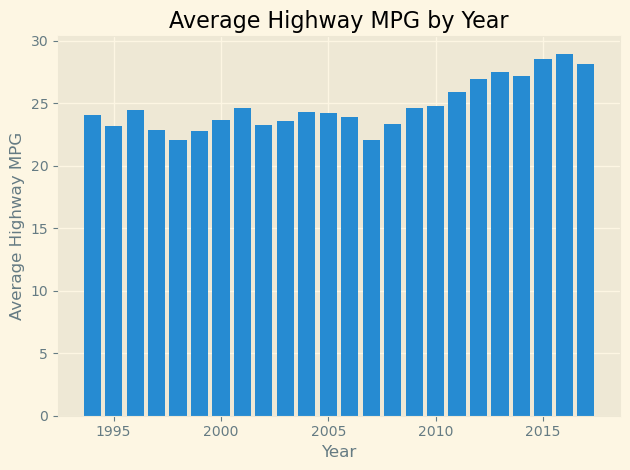

In [398]:
# Creating a new dataframe that averages all numeric values grouped by the Year 
groupedYear = df.groupby(["Year"]).mean(numeric_only = True)

# Apply a built-in style for just this graph
with plt.style.context('Solarize_Light2'):

    # Plots a bar graph of highway MPG by year
    plt.bar(groupedYear.index, groupedYear['highway MPG'])
    
    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('Average Highway MPG')
    plt.title('Average Highway MPG by Year')
    
    # Sets the size of the displayed graph to a tight layout 
    plt.tight_layout()
    
    plt.show()

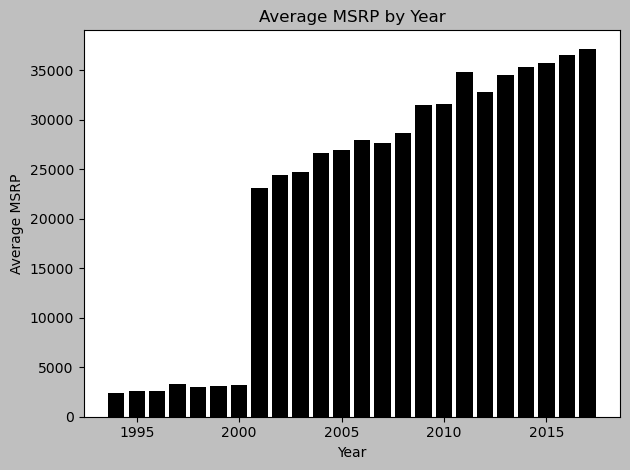

In [400]:
# Apply a built-in style for just this graph
with plt.style.context('grayscale'):

    # Plots a bar graph of MSRP by Year
    plt.bar(groupedYear.index, groupedYear['MSRP'])
    
    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('Average MSRP')
    plt.title('Average MSRP by Year')
    
    # Sets the size of the displayed graph to a tight layout 
    plt.tight_layout()
    
    plt.show()

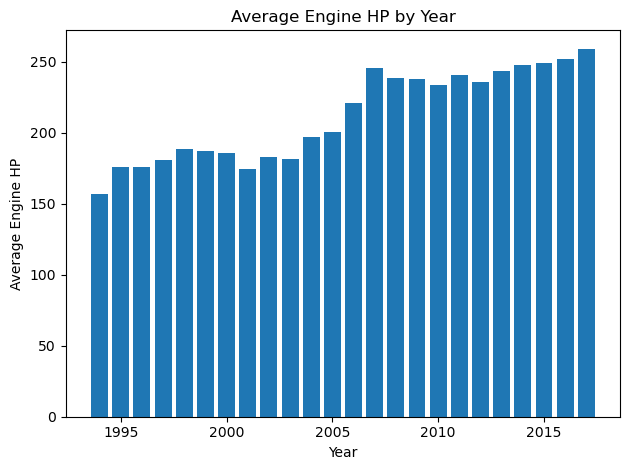

In [402]:
# Plots a bar graph of Engine HP by Year
plt.bar(groupedYear.index, groupedYear['Engine HP'])

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Engine HP')
plt.title('Average Engine HP by Year')

# Sets the size of the displayed graph to a tight layout 
plt.tight_layout()

plt.show()

### Pie Chart

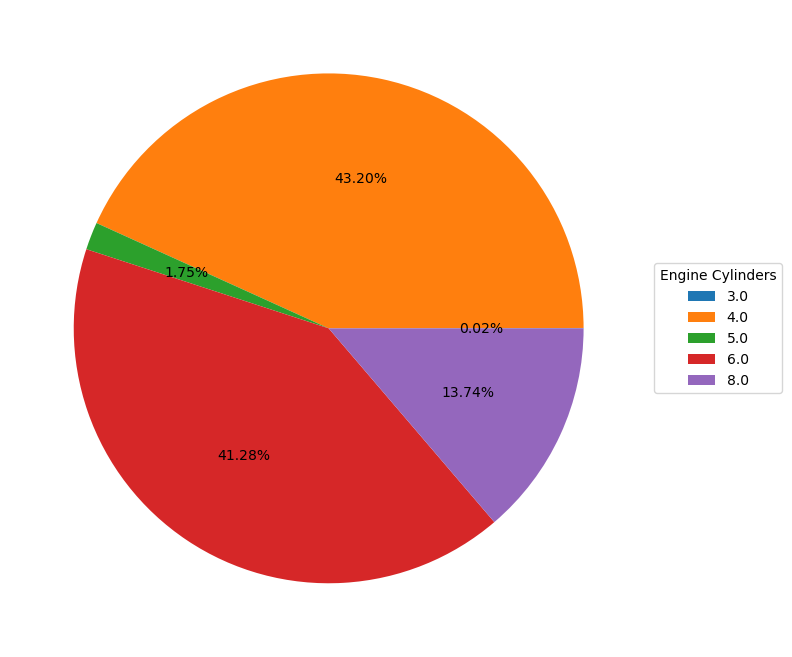

In [412]:
# Creating a new dataframe that averages all numeric values grouped by Engine Cylinders 
groupedCylinder = df.groupby('Engine Cylinders').size().reset_index(name='count')

# Sets the plot size for figure 7
fig7, ax = plt.subplots(figsize=(8, 8))

# uses the subplot function to define the 'wedges', 'texts', and autotexts' variables
wedges, texts, autotexts = ax.pie(
    groupedCylinder['count'], 
    labels=None,
    autopct='%1.2f%%' # autotexts. this will fill in the percentages up to 2 decimal points
)

# Sets the legend to be displayed
ax.legend(
    wedges, #What different categories are being represented by the wedges
    groupedCylinder['Engine Cylinders'], # The values being represented in the pie chart
    title="Engine Cylinders", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1) # Defines the location and dimensions
)

# Displays graph
plt.tight_layout()
plt.show() 